In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
X1=[-0.5,0.5,-0.5,0.5];                     #Input data
X2=[-0.5,-0.5,0.5,0.5];
X3=[1,1,1,1];
X=np.array([X1,X2,X3]).T
X.shape


(4, 3)

In [3]:
t=np.array([[-0.5,0.5,0.5,-0.5]]).T;        #Target values
t.shape

(4, 1)

### First I defined necessary functions
#### nonlin applies the activation or derivative of activation function
#### MSE calculates the Error
#### NN is feedforward
#### Optimization is the optimization process throgh SGD 

In [4]:
def nonlin(x,deriv=False):                  # Activation function (thanh(x)) and its derivative
    if(deriv==True):
        return (1-nonlin(x,deriv=False)*nonlin(x,deriv=False))#nonlin(x,deriv=False)*(1-nonlin(x,deriv=False))#
    return np.divide((np.exp(x)-np.exp(-x)),(np.exp(x)+np.exp(-x)))#1/(1+np.exp(-x))#

In [5]:
def MSE(y,t):                               # Define the loss function
    E=1/2*(y-t)**2
    return np.sum(E)


In [6]:
def NN(X,w,weightlast):                     #Building a two layer NN with n neurons
    m, g = np.shape(X)
    y=np.zeros((m,1))
    dery = np.zeros((m, 1))
    for j in range(0,m):
        a=X[j:j+1,:].T
        z = nonlin(w@a)
        dervz=nonlin(w@a, deriv=True)
        y[j]=nonlin(weightlast@z)
        dery[j] =nonlin(weightlast @ z, deriv=True)

    return y, dery, z, dervz

In [7]:
def Optimization(n=6,alpha=0.1,momentum=True,gama=0.9, max_iter=1000):
    """
    Inputs:
    n Number of neurons
    alpha learning rate
    momentum True or False (#True for SGD with momentum)
    gama
    
    
    """
    random.seed(10)
    w=np.random.rand(n,3)           # weights of the first layer
    #w=w/np.linalg.norm(w)
    weightlast=np.random.rand(1, n)  #weights of last layer
    #weightlast=weightlast/np.linalg.norm(weightlast)
    
    E=[]
    vtl=0                                     #Parameters to be used in SGD with momentum
    vt=0
    y,a,b,c=NN(X,w,weightlast)
    print("Initial error is", MSE(y,t))
    for itr in range(0,max_iter):               #Optimization
        if MSE(y,t)>0.05:
            for k in range(0,4):
                y,dery,z, dervz=NN(X[k:k+1,:],w,weightlast)
                dervwlast=np.zeros(n)
                dervwlast=((y-t[k])*z*dery).T
                if momentum==True:
                    vtl=gama*vtl+alpha*dervwlast
                    weightlast=weightlast-vtl
                else:
                    weightlast=weightlast-dervwlast*alpha
                dervw=np.zeros((n,3))
                for i in range(0,n):
                    for j in range(0,3):
                        dervw[i,j]=(y-t[k])*weightlast[0,i]*dervz[i]*X[k,j]
                if momentum==True:
                    vt=gama*vt+alpha*dervw
                    w=w-vt
                else:
                    w = w - dervw * alpha

            y, g, b, c = NN(X, w, weightlast)
            E.append(MSE(y,t))
        else:
            print("The number of iteration when the average MSE for the whole dataset is less than 0.05 is ", itr)
            break



    print("And final error is", MSE(y,t))
    return E,w, weightlast



  

### Task 1: 
Implement the neural network above with 2,4 and 6 hidden layer neurons. Set the learning rate α to be 0.1. Convergence is reached when your average MSE for the whole dataset is less than 0.05. Plot and compare your results.

In [8]:
print('Results for Task1 n=2: ')
E2, W2, Weightlast2=Optimization(n=2,alpha=0.1,momentum=False,gama=0.9, max_iter=1000)
print()
print('Results for Task1 n=4: ')
E4, W4, Weightlast4=Optimization(n=4,alpha=0.1,momentum=False,gama=0.9, max_iter=1000)
print()
print('Results for Task1 n=6: ')
E6, W6, Weightlast6=Optimization(n=6,alpha=0.1,momentum=False,gama=0.9, max_iter=1000)

Results for Task1 n=2: 
Initial error is 0.6498948862122804
The number of iteration when the average MSE for the whole dataset is less than 0.05 is  580
And final error is 0.049293399898833024

Results for Task1 n=4: 
Initial error is 1.2843650581932542
The number of iteration when the average MSE for the whole dataset is less than 0.05 is  113
And final error is 0.04863800295480557

Results for Task1 n=6: 
Initial error is 1.1942037386029576
The number of iteration when the average MSE for the whole dataset is less than 0.05 is  98
And final error is 0.049112362886819756


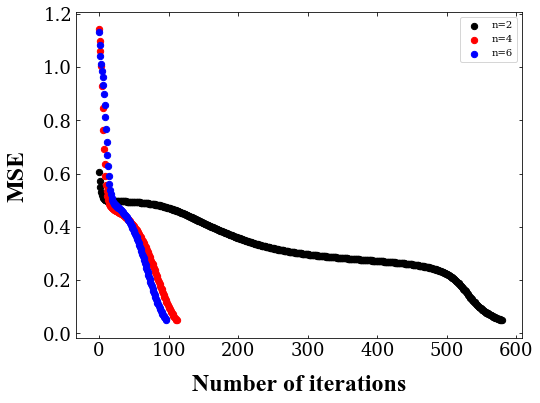

In [9]:
csfont = {'fontname':'Times New Roman', 'fontstyle': 'normal'}
plt.rc('font', family='serif') 
plt.rc('axes', labelpad=15 )
plt.rc('xtick', labelsize=18, direction='in',top=True) 
plt.rc('ytick', labelsize=18, direction='in', right=True) 

plt.figure(figsize=(8,6))
plt.xlabel('Number of iterations', fontsize=24, **csfont)
plt.ylabel('MSE', fontsize=24, **csfont)
plt.scatter(range(len(E2)), E2, color='black', s=40, label='n=2')
plt.scatter(range(len(E4)), E4, color='red', s=40, label='n=4')
plt.scatter(range(len(E6)), E6, color='blue', s=40, label='n=6')
plt.legend()


It seems we have a local minimum

 #### Results:Network with 6 neorons converge faster

In [10]:
ypred2,a,b,c=NN(X,W2,Weightlast2)
ypred4,a,b,c=NN(X,W4,Weightlast4)
ypred6,a,b,c=NN(X,W6,Weightlast6)


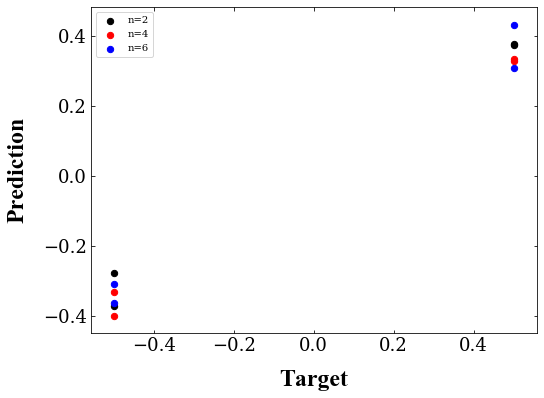

In [11]:
csfont = {'fontname':'Times New Roman', 'fontstyle': 'normal'}
plt.rc('font', family='serif') 
plt.rc('axes', labelpad=15 )
plt.rc('xtick', labelsize=18, direction='in',top=True) 
plt.rc('ytick', labelsize=18, direction='in', right=True) 

plt.figure(figsize=(8,6))
plt.xlabel('Target', fontsize=24, **csfont)
plt.ylabel('Prediction', fontsize=24, **csfont)
plt.scatter(t, ypred2, color='black', s=40, label='n=2')
plt.scatter(t, ypred4, color='red', s=40, label='n=4')
plt.scatter(t, ypred6, color='blue', s=40, label='n=6')
plt.legend()

### Task 2, Add momentum
Implement the neural network above with 2,4 and 6 hidden layer neurons now with momentum (1-st order lowpass). Set the learning rate α to be 0.1 and momentum parameter γ to be 0.9. Convergence is reached when your average MSE for the whole dataset is less than 0.05. Plot and compare your results.

In [12]:
print('Results for Task1 n=2: ')
E2, W2, Weightlast2=Optimization(n=2,alpha=0.1,momentum=True,gama=0.9, max_iter=1000)
print()
print('Results for Task1 n=4: ')
E4, W4, Weightlast4=Optimization(n=4,alpha=0.1,momentum=True,gama=0.9, max_iter=1000)
print()
print('Results for Task1 n=6: ')
E6, W6, Weightlast6=Optimization(n=6,alpha=0.1,momentum=True,gama=0.9, max_iter=1000)

Results for Task1 n=2: 
Initial error is 1.0824418827029694
The number of iteration when the average MSE for the whole dataset is less than 0.05 is  178
And final error is 0.042565784040546305

Results for Task1 n=4: 
Initial error is 0.8927582991220318
The number of iteration when the average MSE for the whole dataset is less than 0.05 is  22
And final error is 0.03620168179152196

Results for Task1 n=6: 
Initial error is 1.2962901102299529
The number of iteration when the average MSE for the whole dataset is less than 0.05 is  16
And final error is 0.01568345219441526


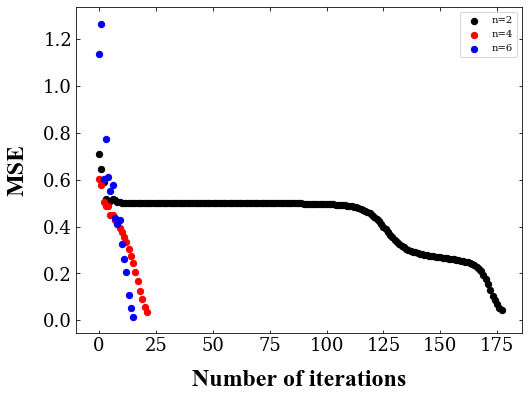

In [13]:
csfont = {'fontname':'Times New Roman', 'fontstyle': 'normal'}
plt.rc('font', family='serif') 
plt.rc('axes', labelpad=15 )
plt.rc('xtick', labelsize=18, direction='in',top=True) 
plt.rc('ytick', labelsize=18, direction='in', right=True) 

plt.figure(figsize=(8,6))
plt.xlabel('Number of iterations', fontsize=24, **csfont)
plt.ylabel('MSE', fontsize=24, **csfont)
plt.scatter(range(len(E2)), E2, color='black', s=40, label='n=2')
plt.scatter(range(len(E4)), E4, color='red', s=40, label='n=4')
plt.scatter(range(len(E6)), E6, color='blue', s=40, label='n=6')
plt.legend()


In [14]:
ypred2,a,b,c=NN(X,W2,Weightlast2)
ypred4,a,b,c=NN(X,W4,Weightlast4)
ypred6,a,b,c=NN(X,W6,Weightlast6)


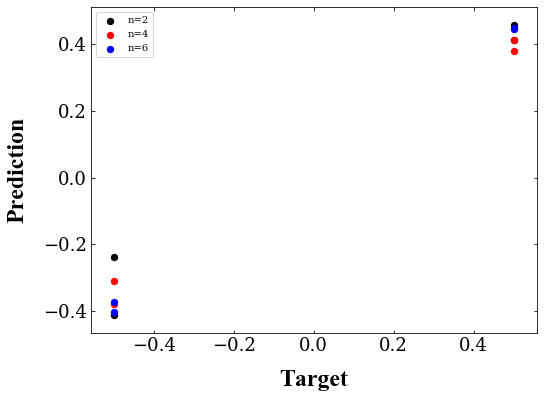

In [15]:
csfont = {'fontname':'Times New Roman', 'fontstyle': 'normal'}
plt.rc('font', family='serif') 
plt.rc('axes', labelpad=15 )
plt.rc('xtick', labelsize=18, direction='in',top=True) 
plt.rc('ytick', labelsize=18, direction='in', right=True) 

plt.figure(figsize=(8,6))
plt.xlabel('Target', fontsize=24, **csfont)
plt.ylabel('Prediction', fontsize=24, **csfont)
plt.scatter(t, ypred2, color='black', s=40, label='n=2')
plt.scatter(t, ypred4, color='red', s=40, label='n=4')
plt.scatter(t, ypred6, color='blue', s=40, label='n=6')
plt.legend()

# We'll have a faster convergence if we use SGD with momentum (Momentum=True).